In [0]:
from keras.applications.vgg16 import VGG16
import matplotlib.image as mpimg
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
K.clear_session()

In [0]:
img_path = 'landmark_aligned_face.55.9981732215_12862f9950_o.jpg'
img=mpimg.imread(img_path)


In [0]:
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)


In [0]:
import numpy as np
x = np.expand_dims(x, axis=0)

In [819]:
x.shape

(1, 224, 224, 3)

In [0]:
from keras.applications.vgg16 import preprocess_input
x = preprocess_input(x)

In [821]:


import pandas as pd
from keras.applications.vgg16 import decode_predictions
preds = model.predict(x)
predictions = pd.DataFrame(decode_predictions(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
print('PREDICTION:',predictions.loc[0,'category'])



PREDICTION: brassiere


Text(0.5, 1.0, 'Top 3 Predictions:')

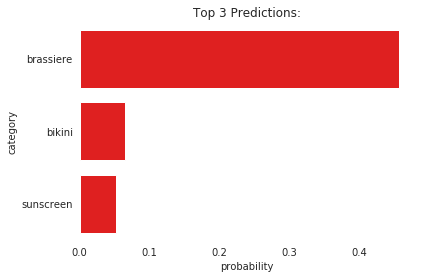

In [822]:
import seaborn as sns
f = sns.barplot(x='probability',y='category',data=predictions,color="red")
sns.set_style(style='white')
f.grid(False)
f.spines["top"].set_visible(False)
f.spines["right"].set_visible(False)
f.spines["bottom"].set_visible(False)
f.spines["left"].set_visible(False)
f.set_title('Top 3 Predictions:')

In [0]:
argmax = np.argmax(preds[0])

In [0]:
output = model.output[:, argmax]

In [0]:
last_conv_layer = model.get_layer('block5_conv3')

In [0]:
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

In [0]:
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

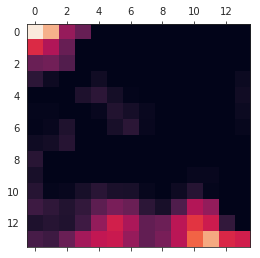

In [828]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [0]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
hif = .8
superimposed_img = heatmap * hif + img

In [0]:
output = 'output_8.jpeg'
cv2.imwrite(output, superimposed_img)

img=mpimg.imread(output)
